In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: c:\Users\user\Desktop\cyber-threat-predictor\notebooks


In [195]:
df = pd.read_csv('../data/raw/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [192]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

In [196]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']


In [197]:
categorical_cols = df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(df[categorical_cols])

encoded_columns = ohe.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

df_final = pd.concat([
    df.drop(columns=categorical_cols),
    encoded_df
], axis=1)

df_final.head()


,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours),Country_Australia,Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,...,Attack Source_Unknown,Security Vulnerability Type_Social Engineering,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_AI-based Detection,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN
0,2019,80.53,773169,63,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019,62.19,295961,71,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2017,38.65,605895,20,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2024,41.44,659320,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2018,74.41,810682,68,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Building Dataset For Model Chaining - DF-MODEL_1

In [193]:
# Step 1: Save the target variable
y1 = df['Attack Type']

# Step 2: Drop the target column from features
X1 = df.drop(columns=['Attack Type'])

# Step 3: One-hot encode the categorical features
X1_encoded = pd.get_dummies(X1)

# Optional: Label encode the y1 for classification
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y1_encoded = label_encoder.fit_transform(y1)

# Save the encoder for decoding later
import pickle
with open('../models/attack_type_label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [194]:
df_final_model1 = X1_encoded.copy()
df_final_model1['Attack Type'] = y1  # For inspection
df_final_model1.to_csv('../data/processed/df_final_model1.csv', index=False)


# Done, now we make DF-MODEL_2

In [199]:
attack_type_cols = [col for col in df_final.columns if col.startswith('Attack Type_')]

# For model 2
df_final_model2 = df_final.drop(columns=attack_type_cols)

# Define features and label
X2 = df_final_model2.drop(columns=['Financial Loss (in Million $)'])
y2 = df_final_model2['Financial Loss (in Million $)']


In [202]:
df_final_model2.to_csv('../data/processed/df_final_model2.csv', index=False)
df_final_model2.dtypes
df_final_model2.columns

Index(['Year', 'Financial Loss (in Million $)', 'Number of Affected Users',
       'Incident Resolution Time (in Hours)', 'Country_Australia',
       'Country_Brazil', 'Country_China', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Russia', 'Country_UK',
       'Country_USA', 'Target Industry_Banking', 'Target Industry_Education',
       'Target Industry_Government', 'Target Industry_Healthcare',
       'Target Industry_IT', 'Target Industry_Retail',
       'Target Industry_Telecommunications', 'Attack Source_Hacker Group',
       'Attack Source_Insider', 'Attack Source_Nation-state',
       'Attack Source_Unknown',
       'Security Vulnerability Type_Social Engineering',
       'Security Vulnerability Type_Unpatched Software',
       'Security Vulnerability Type_Weak Passwords',
       'Security Vulnerability Type_Zero-day',
       'Defense Mechanism Used_AI-based Detection',
       'Defense Mechanism Used_Antivirus', 'Defense Mechanism Used_Enc

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(df['Attack Type'])
attack_type_labels = list(le.classes_)


In [20]:
print(attack_type_labels)

['DDoS', 'Malware', 'Man-in-the-Middle', 'Phishing', 'Ransomware', 'SQL Injection']


In [22]:
print(y_encoded[:10])

[3 4 2 4 2 2 0 5 2 0]


In [23]:
unique, counts = np.unique(y_encoded, return_counts=True)
print(dict(zip(unique,counts)))

{0: 531, 1: 485, 2: 459, 3: 529, 4: 493, 5: 503}


In [56]:
X = df.drop(columns=["Attack Type"])
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)

In [ ]:
print(X.columns)

Index(['Country', 'Year', 'Target Industry', 'Financial Loss (in Million $)',
       'Number of Affected Users', 'Attack Source',
       'Security Vulnerability Type', 'Defense Mechanism Used',
       'Incident Resolution Time (in Hours)'],
      dtype='object')


In [50]:
nums_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", nums_cols)

Numerical Columns: ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

nums_cols = ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

X_train[nums_cols] = scaler.fit_transform(X_train[nums_cols])
X_test[nums_cols] = scaler.transform(X_test[nums_cols])

In [57]:
X_train.head()

,Country,Year,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
917,USA,2018,IT,82.13,220618,Unknown,Weak Passwords,Firewall,59
178,UK,2020,Healthcare,67.90,2233,Unknown,Social Engineering,Antivirus,45
707,UK,2021,Telecommunications,3.17,570243,Insider,Unpatched Software,Antivirus,51
1121,France,2015,Banking,64.62,104619,Insider,Unpatched Software,Antivirus,68
750,Japan,2021,Government,22.94,622723,Nation-state,Weak Passwords,AI-based Detection,67


# This is to check how many features i have 

In [33]:
X_train.shape[1]

9

In [65]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,902 (19.15 KB)

 Trainable params: 4,902 (19.15 KB)

 Non-trainable params: 0 (0.00 B)

# The First Error Yeyyyyyy!!!!!!!!!!!!!!!

In [54]:
history = model.fit(
    X_train, y_train,
    epochs = 30,
    batch_size =32,
    validation_split = 0.2
)

ValueError: could not convert string to float: 'China'

In [45]:
print(X_train.dtypes)

Country                                 object
Year                                   float64
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users               float64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)    float64
dtype: object


# THE FIX!

In [115]:
# 1. Find categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 2. OneHotEncode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = ohe.fit_transform(df[categorical_cols])

# 3. Create encoded dataframe
encoded_columns = ohe.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)   # ✨ Match the original index!

# 4. Combine numerical and encoded
df_final = pd.concat([
    df.drop(columns=categorical_cols),
    encoded_df
], axis=1)

# 5. Optional: Convert to float32
df_final = df_final.astype('float32')

# 6. Check
df_final.head()


,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours),Country_Australia,Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,...,Attack Source_Unknown,Security Vulnerability Type_Social Engineering,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_AI-based Detection,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN
0,2019.0,80.529999,773169.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019.0,62.189999,295961.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2017.0,38.650002,605895.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2024.0,41.439999,659320.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2018.0,74.410004,810682.0,68.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Need To Resplit

In [70]:
X = df_final
y = y_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)

In [71]:
history = model.fit(
    X_train, y_train,
    epochs = 30,
    batch_size =32,
    validation_split = 0.2
)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1990 - loss: 492.2784 - val_accuracy: 0.1312 - val_loss: 870.6152
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1786 - loss: 682.7932 - val_accuracy: 0.1604 - val_loss: 422.5121
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1525 - loss: 728.4003 - val_accuracy: 0.1750 - val_loss: 882.1915
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1811 - loss: 831.7050 - val_accuracy: 0.1958 - val_loss: 740.7717
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1816 - loss: 638.5911 - val_accuracy: 0.1750 - val_loss: 332.4133
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1851 - loss: 484.2595 - val_accuracy: 0.1917 - val_loss: 854.5731
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1769 - loss: 886.9865 - val_accuracy: 0.1771 - val_loss: 678.7425
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1714 - loss: 1001.3296 - v

# Bad Result, AI TRY!

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # not X! it's y

# Then split:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y_encoded)


In [74]:
del model

In [75]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,902 (19.15 KB)

 Trainable params: 4,902 (19.15 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
history = model.fit(
    X_train, y_train,
    epochs = 30,
    batch_size =32,
    validation_split = 0.2
)

Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3448 - loss: 1.6022 - val_accuracy: 0.8500 - val_loss: 0.9338
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9289 - loss: 0.6764 - val_accuracy: 1.0000 - val_loss: 0.2001
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1284 - val_accuracy: 1.0000 - val_loss: 0.0538
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0366 - val_accuracy: 1.0000 - val_loss: 0.0246
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0188 - val_accuracy: 1.0000 - val_loss: 0.0144
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss:

# Test With Dummies

In [77]:
import numpy as np
import pandas as pd

# Create 100 dummy samples
n_samples = 100
n_features = 40  # Match your model input

# Random values between 0 and 1 (since your features are one-hot encoded or normalized)
X_dummy = np.random.rand(n_samples, n_features)

# If you want a DataFrame
X_dummy_df = pd.DataFrame(X_dummy, columns=[f"feature_{i}" for i in range(n_features)])

X_dummy_df.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39
0,0.570339,0.198979,0.093550,0.227730,0.256497,0.623082,0.902197,0.455568,0.543215,0.829891,...,0.626727,0.274521,0.220650,0.857221,0.690026,0.252995,0.535973,0.104423,0.723815,0.511663
1,0.502539,0.965841,0.645265,0.386373,0.987504,0.628370,0.275580,0.236814,0.986983,0.419491,...,0.469081,0.706465,0.379733,0.119539,0.696440,0.371984,0.213696,0.184176,0.382019,0.038262
2,0.367166,0.534896,0.925376,0.169531,0.595915,0.998111,0.178099,0.043329,0.059962,0.073088,...,0.839867,0.486344,0.734205,0.499673,0.970638,0.882138,0.741552,0.341790,0.556115,0.028693
3,0.156861,0.605697,0.040273,0.874738,0.703141,0.368974,0.219731,0.323024,0.004992,0.560976,...,0.015341,0.981285,0.463321,0.841200,0.047417,0.665108,0.339997,0.051638,0.065018,0.271094
4,0.892455,0.662810,0.068566,0.341382,0.864194,0.563560,0.334117,0.656956,0.472738,0.066231,...,0.155114,0.205164,0.372519,0.419355,0.357062,0.206570,0.348073,0.109452,0.906843,0.585723


In [78]:
# Make sure your dummy data is float32 (same as model expects)
X_dummy = X_dummy.astype(np.float32)

# Predict
predictions = model.predict(X_dummy)

# If you used one-hot encoding on y, you might want to decode predictions
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[5 0 3 0 0 2 5 2 5 1 5 5 3 5 5 0 5 5 3 1 1 2 0 4 1 3 1 3 4 2 4 1 4 4 3 4 1
 4 5 5 3 3 0 1 5 4 5 1 1 3 5 1 1 4 1 4 2 4 4 3 5 3 2 5 0 3 3 3 3 0 1 2 5 1
 0 5 3 5 3 1 1 0 5 1 3 3 4 2 1 4 3 5 3 4 0 0 4 2 1 4]


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


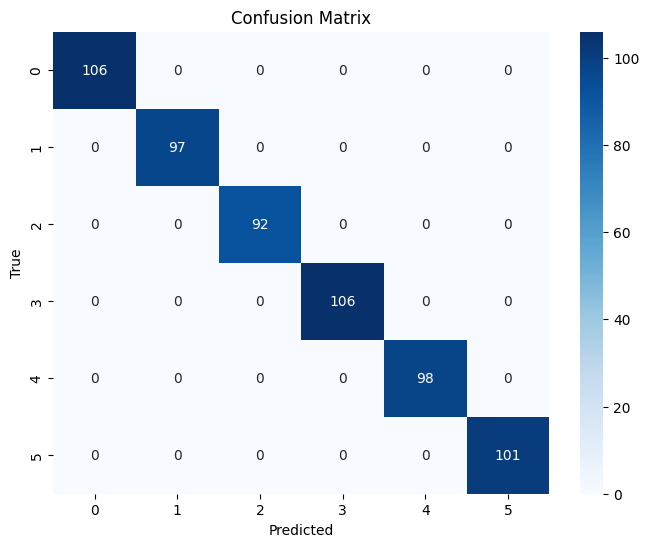

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00       106
           4       1.00      1.00      1.00        98
           5       1.00      1.00      1.00       101

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Overall Test Accuracy: 1.0000


In [79]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # because it's multi-class classification

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 3. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes))

# 4. Overall Accuracy
acc = accuracy_score(y_test, y_pred_classes)
print(f"Overall Test Accuracy: {acc:.4f}")


In [82]:
# Save the TensorFlow model
#model.save('../models/model1_attack_type.h5')

# If you had a Scikit-learn baseline model, you would do:
import joblib
joblib.dump(ohe, '../models/model1_attack_type.pkl')


['../models/model1_attack_type.pkl']

# Model 2 (Regression)

In [ ]:
#df_final = df_final['Financial Loss (in Million $)'] * 1_000_000 
# Not needed because the DNN performs so much bad because the numbers too high

In [149]:
# Test with different Code
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Features and target
X2 = df_final.drop(columns=['Financial Loss (in Million $)'])
y2 = df_final['Financial Loss (in Million $)']

# 1. Normalize X2 only
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# 2. Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

# 3. Train your DNN model (same architecture as before)

# 4. Evaluate


In [132]:
df_final['Financial Loss (in Million $)']

0       80.529999
1       62.189999
2       38.650002
3       41.439999
4       74.410004
          ...    
2995    51.419998
2996    30.280001
2997    32.970001
2998    32.169998
2999    48.200001
Name: Financial Loss (in Million $), Length: 3000, dtype: float32

In [ ]:
# df_final['Predicted Attack Type'] = y_pred

ValueError: Length of values (600) does not match length of index (3000)

In [104]:
df_final.columns

Index(['Year', 'Financial Loss (in Million $)', 'Number of Affected Users',
       'Incident Resolution Time (in Hours)', 'Country_Australia',
       'Country_Brazil', 'Country_China', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Russia', 'Country_UK',
       'Country_USA', 'Attack Type_DDoS', 'Attack Type_Malware',
       'Attack Type_Man-in-the-Middle', 'Attack Type_Phishing',
       'Attack Type_Ransomware', 'Attack Type_SQL Injection',
       'Target Industry_Banking', 'Target Industry_Education',
       'Target Industry_Government', 'Target Industry_Healthcare',
       'Target Industry_IT', 'Target Industry_Retail',
       'Target Industry_Telecommunications', 'Attack Source_Hacker Group',
       'Attack Source_Insider', 'Attack Source_Nation-state',
       'Attack Source_Unknown',
       'Security Vulnerability Type_Social Engineering',
       'Security Vulnerability Type_Unpatched Software',
       'Security Vulnerability Type_Weak Passw

In [ ]:
X2 = df_final.drop(columns=['Financial Loss (in Million $)'])
y2 = df_final['Financial Loss (in Million $)']

from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)


In [135]:
df_final.head()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours),Country_Australia,Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,...,Attack Source_Unknown,Security Vulnerability Type_Social Engineering,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_AI-based Detection,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN
0,2019.0,80.529999,773169.0,63.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019.0,62.189999,295961.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2017.0,38.650002,605895.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2024.0,41.439999,659320.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2018.0,74.410004,810682.0,68.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

baseline_model = LinearRegression()
baseline_model.fit(X2_train, y2_train)

LinearRegression()

In [137]:
y2_pred = baseline_model.predict(X2_test)

mse = mean_squared_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print(f'Baseline Model (MSE) :  {mse:.2f}')
print(f'Baseline R2 Score : {r2: .2f}')

Baseline Model (MSE) :  814.17
Baseline R2 Score : -0.01


# This Model s just using Financial Loss for the target

In [167]:

dnn_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X2_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

dnn_model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

history = dnn_model.fit(
    X2_train, y2_train,
    validation_data=(X2_test, y2_test),
    epochs = 100,
    batch_size = 32,
    verbose = 1
)

Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2948.1003 - mae: 46.0756 - val_loss: 874.4633 - val_mae: 25.0982
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 847.6544 - mae: 25.1324 - val_loss: 831.9721 - val_mae: 24.8430
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 793.1916 - mae: 24.2836 - val_loss: 835.3850 - val_mae: 24.9864
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 778.6074 - mae: 24.1007 - val_loss: 833.4587 - val_mae: 24.9152
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 800.3892 - mae: 24.2822 - val_loss: 835.9146 - val_mae: 24.9684
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 777.0107 - mae: 24.1321 - val_loss: 861.8447 - val_mae: 25.0911
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 762.0100 - mae: 23.7391 - val_loss: 843.8353 - val_mae: 24.9764
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 732.4591 - mae: 23.2535 - val_loss: 864.9958 - val_mae: 25.2027
Epoch 9/100
75/75 ━━━━━━━━━

In [169]:
# Evaluate on test set
dnn_eval = dnn_model.evaluate(X2_test, y2_test)
print(f"DNN Model - Test Loss (MSE): {dnn_eval[0]:.2f}")
print(f"DNN Model - Test MAE: {dnn_eval[1]:.2f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1575.4495 - mae: 32.8515 
DNN Model - Test Loss (MSE): 1535.23
DNN Model - Test MAE: 32.23


In [203]:
joblib.dump(baseline_model, '../models/financial_loss_model.pkl')
dnn_model.save('../models/financial_loss_dnn_model.h5') #this is legacy
#dnn_model.save('../models/financial_loss_dnn_model.keras')

# I will try to make model that more realistic and have big correlation in real world (Financial Loss + Number User Affected) 

In [175]:
X3 = df_final.drop(columns=['Financial Loss (in Million $)','Number of Affected Users'])
y3 = df_final[['Financial Loss (in Million $)','Number of Affected Users']]

print(X3.shape)
print(y3.shape)


(3000, 38)
(3000, 2)


In [176]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler_y3 = MinMaxScaler()

# Fit scaler only on y3 (targets)
y3_scaled = scaler_y3.fit_transform(y3)

print(y3_scaled[:5])  # Just check first few rows


[[0.8044025  0.77335525]
 [0.62006235 0.29577038]
 [0.38345566 0.6059491 ]
 [0.41149864 0.6594163 ]
 [0.7428888  0.8108978 ]]


In [177]:
X3_train,X3_test,y3_train,y3_test = train_test_split(X3, y3_scaled,test_size=0.2, random_state=42 )

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

baseline_model = LinearRegression()
baseline_model.fit(X3_train, y3_train)

LinearRegression()

In [179]:
y3_pred = baseline_model.predict(X3_test)

mse = mean_squared_error(y3_test, y3_pred)
r2 = r2_score(y3_test, y3_pred)

print(f'Baseline Model (MSE) :  {mse:.2f}')
print(f'Baseline R2 Score : {r2: .2f}')

Baseline Model (MSE) :  0.08
Baseline R2 Score : -0.01


In [180]:

dnn_model2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X3_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2)
])

dnn_model2.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

history = dnn_model2.fit(
    X3_train, y3_train,
    validation_data=(X3_test, y3_test),
    epochs = 100,
    batch_size = 32,
    verbose = 1
)

Epoch 1/100


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3598.1504 - mae: 37.7937 - val_loss: 2.4367 - val_mae: 1.4125
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9946 - mae: 0.7791 - val_loss: 0.3777 - val_mae: 0.4810
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3434 - mae: 0.4576 - val_loss: 0.3408 - val_mae: 0.4472
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3207 - mae: 0.4441 - val_loss: 0.2650 - val_mae: 0.4059
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2604 - mae: 0.4019 - val_loss: 0.2556 - val_mae: 0.4093
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2263 - mae: 0.3831 - val_loss: 0.2070 - val_mae: 0.3616
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1911 - mae: 0.3522 - val_loss: 0.1612 - val_mae: 0.3269
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1602 - mae: 0.3251 - val_loss: 0.1522 - val_mae: 0.3170
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1405 - mae:

# The result is even worse lol

In [182]:
# Evaluate on test set
dnn_eval2 = dnn_model2.evaluate(X3_test, y3_test)
print(f"DNN Model - Test Loss (MSE): {dnn_eval[0]:.2f}")
print(f"DNN Model - Test MAE: {dnn_eval[1]:.2f}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4883 - mae: 0.5735
DNN Model - Test Loss (MSE): 1535.23
DNN Model - Test MAE: 32.23


In [184]:
df_final.to_csv('../data/processed/df_final.csv', index=False)
